# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Deep Learning I</font>

# Reconhecimento de Imagens com OpenCV e Redes Neurais Convolucionais

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.6


In [2]:
# Para instalar o OpenCV, digite o comando abaixo no terminal (não instale aqui pelo Jupyter, pois requer confirmação)
# !pip install opencv-python

### Import da Imagem

In [3]:
# Verificando se a GPU tem memória disponível
!nvidia-smi

Sun May  3 15:37:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 440.64.00    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  TITAN X (Pascal)    On   | 00000000:05:00.0 Off |                  N/A |
| 23%   38C    P8     9W / 250W |    114MiB / 12194MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  On   | 00000000:09:00.0 Off |                  N/A |
| 23%   34C    P8     9W / 250W |      2MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [4]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [1]:
import cv2
import skimage
import numpy
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

skimage 0.16.2
numpy   1.18.2
cv2.cv2 4.2.0
scipy   1.4.1
Data Science Academy


In [2]:
# Definindo a imagem. Experimente usar a sua própria imagem.
img_path = 'images/sansa.jpg'

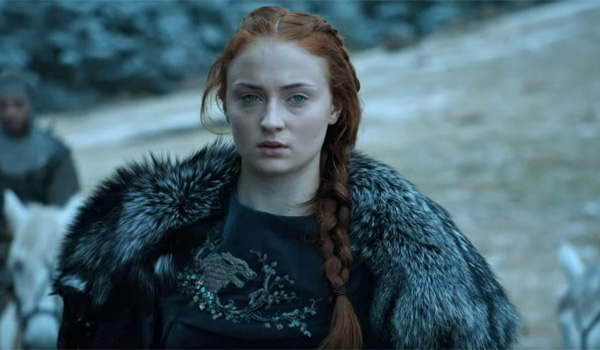

In [3]:
from IPython.display import Image, display
Image('images/sansa.jpg')

In [4]:
# Carregando a imagem com OpenCV
bgr_img = cv2.imread(img_path)

In [8]:
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

In [9]:
# Convertendo a imagem para escala de cinza
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

In [10]:
# Resize da imagem
# A função scipy.misc.imresize() foi descontinuada e devemos usar o Pillow conforme documentação:
# https://docs.scipy.org/doc/scipy-1.2.1/reference/generated/scipy.misc.imresize.html
# small_img = scipy.misc.imresize(gray_img, 0.3)
from PIL import Image
small_img = numpy.array(Image.fromarray(gray_img).resize(size = (100, 100)))

In [11]:
# Aplicando escala a imagem
small_img = small_img.astype("float32")/255

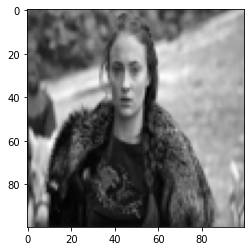

In [12]:
# Plot
plt.imshow(small_img, cmap = 'gray')
plt.show()

### Especificando os Filtros

In [13]:
import numpy as np

# Definindo os valores dos filtros
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

In [15]:
# Definindo os 4 filtros
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = [filter_1, filter_2, filter_3, filter_4]

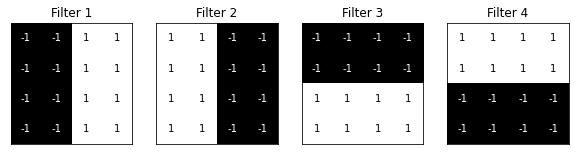

In [16]:
# Visualizando os filtros
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

### Visualizando os Mapas de Ativação Para Cada Filtro 

In [17]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
import matplotlib.cm as cm

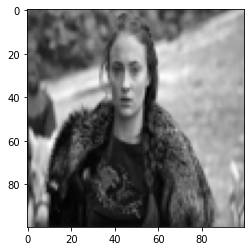

In [18]:
# Plot
plt.imshow(small_img, cmap='gray')

In [19]:
# Define uma rede neural com uma única camada convolucional com um filtro
model = Sequential()
model.add(Convolution2D(1, (4, 4), activation = 'relu', input_shape = (small_img.shape[0], small_img.shape[1], 1)))

In [20]:
# Aplica o filtro convolucional e retorna o output
def apply_filter(img, index, filter_list, ax):
    # Define os pesos do filtro na camada convolucional para filter_list [i]
    model.layers[0].set_weights([np.reshape(filter_list[i], (4,4,1,1)), np.array([0])])
    # Plot do mapa de ativação correspondente
    ax.imshow(np.squeeze(model.predict(np.reshape(img, (1, img.shape[0], img.shape[1], 1)))), cmap='gray')

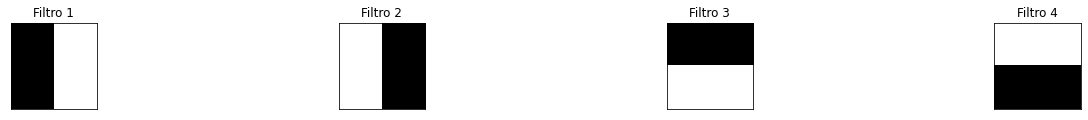

In [21]:
# Visualizando todos os filtros
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filtro %s' % str(i+1))

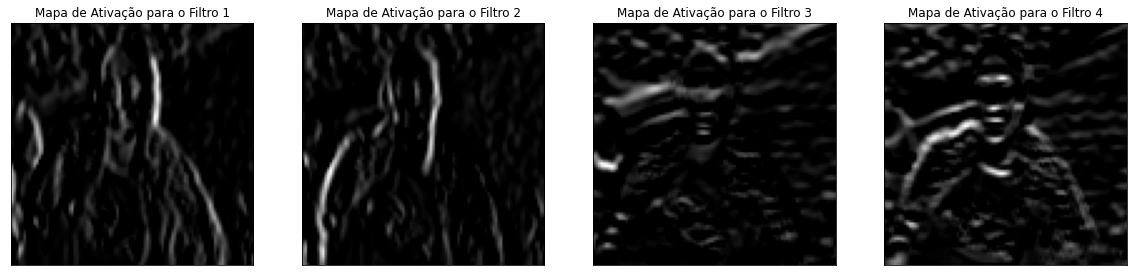

In [22]:
# Visualizando todos os mapas de ativação
fig = plt.figure(figsize=(20, 20))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    apply_filter(small_img, i, filters, ax)
    ax.set_title('Mapa de Ativação para o Filtro %s' % str(i+1))

# Fim